In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
# Function to load and resize images from a directory
def load_images_from_folder(folder, target_size=(256, 256)):
    images = []
    labels = []
    for i, category in enumerate(os.listdir(folder)):
        category_path = os.path.join(folder, category)
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                images.append(img)
                labels.append(i)
    return np.array(images), np.array(labels)

In [3]:
# Load images from the dataset
dataset_path = 'UCMerced_LandUse/Images'
X, y = load_images_from_folder(dataset_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

Epoch 1/10
53/53 [==============================] - 58s 1s/step - loss: 3.8782 - accuracy: 0.0571 - val_loss: 2.8847 - val_accuracy: 0.0762
Epoch 2/10
53/53 [==============================] - 54s 1s/step - loss: 2.5924 - accuracy: 0.1976 - val_loss: 2.5863 - val_accuracy: 0.2214
Epoch 3/10
53/53 [==============================] - 58s 1s/step - loss: 1.4304 - accuracy: 0.5994 - val_loss: 2.3563 - val_accuracy: 0.4333
Epoch 4/10
53/53 [==============================] - 58s 1s/step - loss: 0.5692 - accuracy: 0.8464 - val_loss: 2.7153 - val_accuracy: 0.4238
Epoch 5/10
53/53 [==============================] - 58s 1s/step - loss: 0.2328 - accuracy: 0.9357 - val_loss: 3.7222 - val_accuracy: 0.3357
Epoch 6/10
53/53 [==============================] - 56s 1s/step - loss: 0.1495 - accuracy: 0.9649 - val_loss: 3.1874 - val_accuracy: 0.3500
Epoch 7/10
53/53 [==============================] - 56s 1s/step - loss: 0.0795 - accuracy: 0.9833 - val_loss: 3.0527 - val_accuracy: 0.4571
Epoch 8/10
53/53 [==

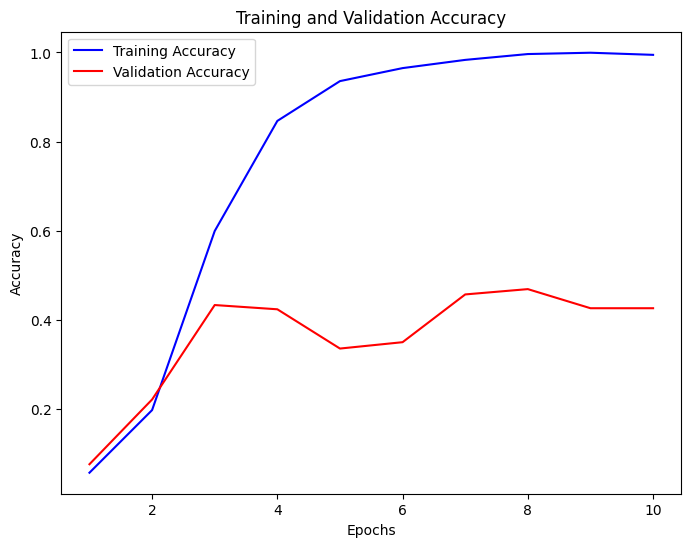

In [4]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(os.listdir(dataset_path)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get training and validation accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create an array of epochs
epochs = np.arange(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

14/14 [==============================] - 2s 155ms/step - loss: 3.3212 - accuracy: 0.4262
Test accuracy: 0.42619046568870544
